# Markov Decision Processes-Frozen lake 8x8

In [1]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd

import time

### Value Iteration

In [5]:
v_time = 0
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
start = time.time()
state_values = value_iteration(env, max_iterations=100000,lmbda=0.9, verbose=0)
policy_value_iteration = get_policy(env, stateValues,lmbda=0.9)

end = time.time()
v_time = end -start

metric(env, policy_value_iteration,episodes=1000)


Average steps to goal 73
% of times agent fell into hole 24.70


Text(0.5, 1.03, 'Frozen Lake 8*8 average convergence across episodes for value iteration')

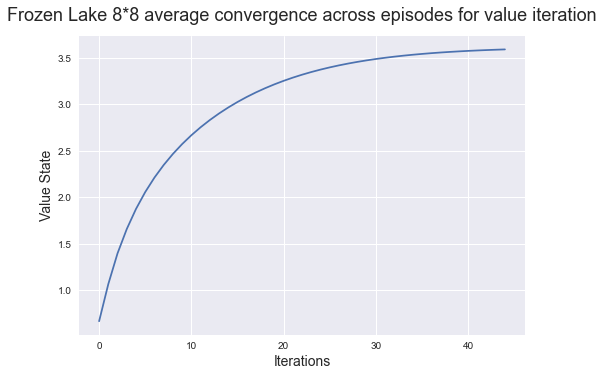

In [6]:
plt.style.use('seaborn')
plt.plot(list(np.arange(iterations)), state_values)
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Frozen Lake 8*8 average convergence across episodes for value iteration', fontsize = 18, y = 1.03)

Text(0.5, 1.03, 'Value state with discounting factor=0.9')

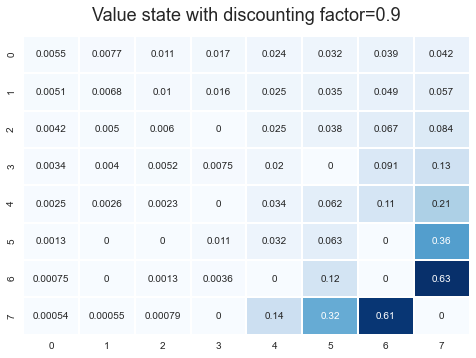

In [7]:
#plot value state
vs = np.round(stateValues, decimals = 5)
vs = vs.reshape(8,8)
ax = sns.heatmap(vs,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Value state with discounting factor=0.9', fontsize = 18, y = 1.03)

Text(0.5, 1.03, 'Policy [0: left, 1: down, 2: right, 3: up]')

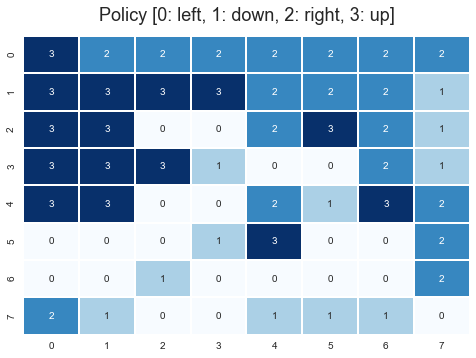

In [8]:
#plot value state
policy = np.array(policy_value_iteration)
policy = policy.reshape(8,8)
ax = sns.heatmap(policy,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Policy [0: left, 1: down, 2: right, 3: up]', fontsize = 18, y = 1.03)

### Policy Iteration

In [12]:
p_time = 0
start = time.time()

V, policy = policy_iteration(env, gamma=0.9, nIt=20)
end = time.time()
p_time = end -start

Text(0.5, 1.03, 'Policy iteration: Value state with discounting factor=0.9')

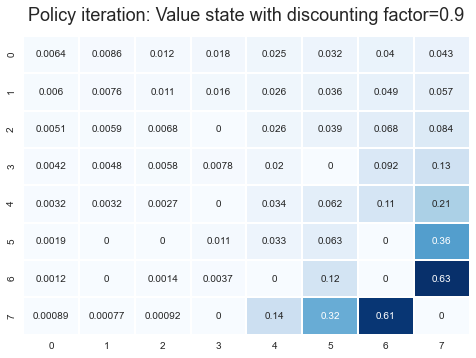

In [13]:
#plot value state
vs = np.round(V[-1], decimals = 5)
vs = vs.reshape(8,8)
ax = sns.heatmap(vs,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Policy iteration: Value state with discounting factor=0.9', fontsize = 18, y = 1.03)

Text(0.5, 1.03, 'Policy iteration: Best policy with discounting factor=0.9')

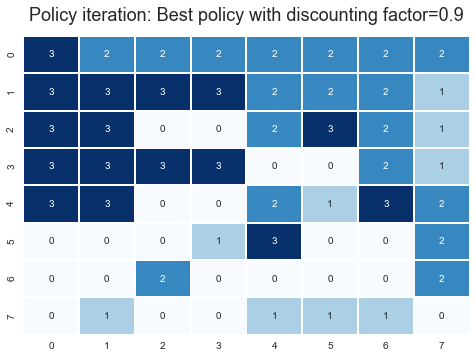

In [14]:
#plot value state
vs = np.round(policy[-1], decimals = 5)
vs = vs.reshape(8,8)
ax = sns.heatmap(vs,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Policy iteration: Best policy with discounting factor=0.9', fontsize = 18, y = 1.03)

Text(0.5, 1.03, 'Frozen Lake 8*8 convergence for policy iteration')

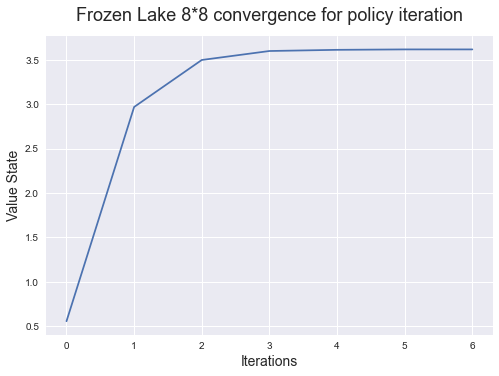

In [15]:
plt.style.use('seaborn')
plt.plot(list(np.arange(iterations+ 1)), np.sum(V, axis=1))
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Frozen Lake 8*8 convergence for policy iteration', fontsize = 18, y = 1.03)

In [16]:
V, policy = policy_iteration(env, gamma=0.9, nIt=20)
metric(env, policy)

Average steps to goal 70
% of times agent fell into hole 27.70


### Q-Learning

Text(0.5, 1.03, 'Frozen Lake 8*8 convergence for Q learning')

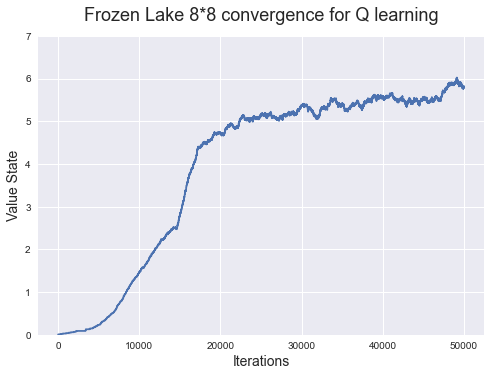

In [18]:
plt.style.use('seaborn')
plt.plot(list(range(1,actual_episodes+1)), qtable_per_episode)
plt.ylabel('Value State', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.ylim(0.0,7)
plt.title('Frozen Lake 8*8 convergence for Q learning', fontsize = 18, y = 1.03)

In [19]:
policy = np.argmax(qtable, axis=1)
metric(env, policy,episodes=1000)

Average steps to goal 70
% of times agent fell into hole 28.10


Text(0.5, 1.03, 'Q learning: Value state')

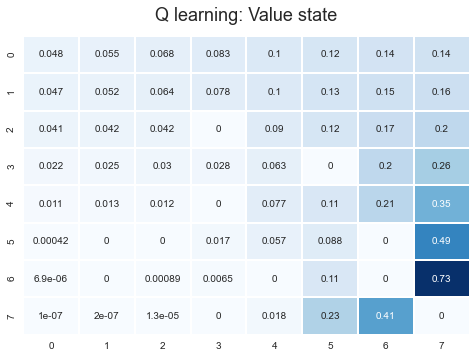

In [20]:
#plot value state
vs = np.round(np.max(qtable,axis=1), decimals = 7)
vs = vs.reshape(8,8)
ax = sns.heatmap(vs,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Q learning: Value state', fontsize = 18, y = 1.03)

Text(0.5, 1.03, 'Q learning: Best policy')

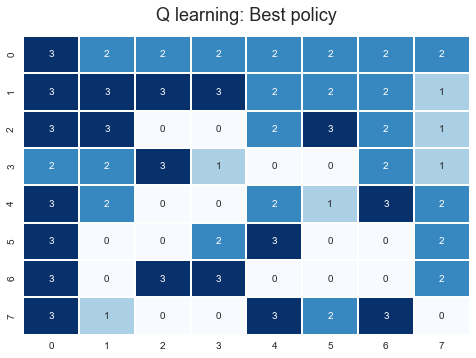

In [21]:
#plot policy
vs = np.round(policy, decimals = 5)
vs = vs.reshape(8,8)
ax = sns.heatmap(vs,linewidth=1,annot=True,cmap="Blues",cbar=False)
plt.title('Q learning: Best policy', fontsize = 18, y = 1.03)

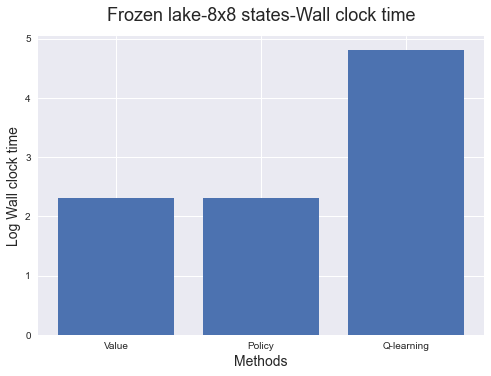

In [22]:
#wall clcok time
#wall clock
plt.bar(['Value','Policy','Q-learning',],[np.log(v_time+10),np.log(p_time+10),np.log(ql_time+10)])
plt.ylabel('Log Wall clock time', fontsize = 14)
plt.xlabel('Methods', fontsize = 14)
plt.title('Frozen lake-8x8 states-Wall clock time', fontsize = 18, y = 1.03)
#plt.ylim(0.5,0.79)
plt.show()

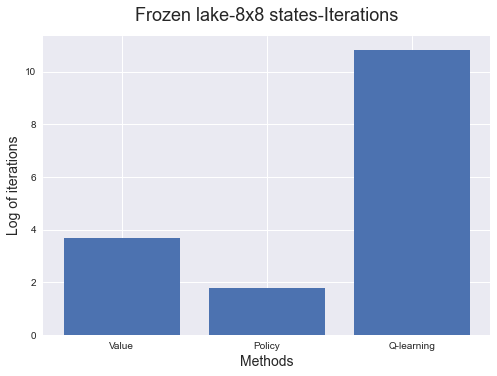

In [23]:
#no of iterations
plt.bar(['Value','Policy','Q-learning',],[np.log(40),np.log(6),np.log(50000)])
plt.ylabel('Log of iterations', fontsize = 14)
plt.xlabel('Methods', fontsize = 14)
plt.title('Frozen lake-8x8 states-Iterations', fontsize = 18, y = 1.03)
#plt.ylim(0.5,0.79)
plt.show()